In [1]:
from dask import dataframe as dd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import pickle
import plotly as py
from sklearn.manifold import TSNE
import dash
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import datetime as dt
# ^^^ pyforest auto-imports - don't write above this line
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#viz modules
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from pywaffle import Waffle

%matplotlib inline
init_notebook_mode(connected= True)

In [2]:
data = pd.read_csv(r'C:\Users\Valentin\Documents\Datasets\healthcare-dataset-stroke-data.csv')

In [3]:
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


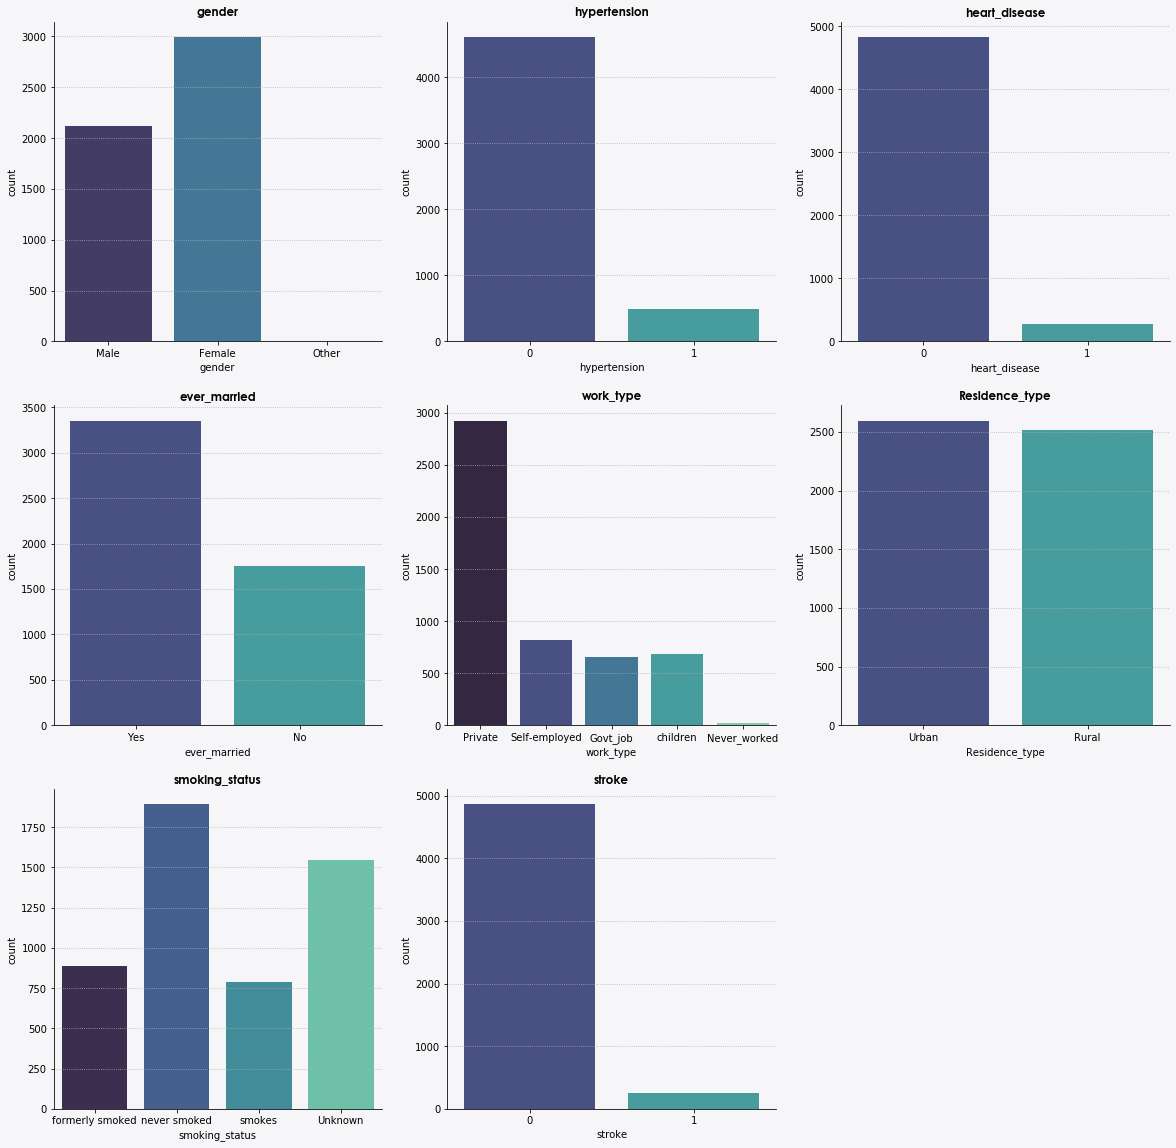

In [4]:
data_categorical = data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

# colors = ["#1E213F", "#397CE4","E55257","ED9A68","3E286A","851963","16BFD3","3E286A","851963","16BFD3"]
# RHC_palette = sns.set_palette(sns.color_palette(colors))

fig=plt.figure(figsize=(20,20))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(3,3,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='Century Gothic')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_categorical[val],palette="mako")

In [5]:
# quick data prep #

### missing bmi values
data['bmi'].fillna(data['bmi'].mean(), inplace = True)
    
### dummy encoding text features
text = [x for x in data.columns if data[x].dtypes == 'object']
data = pd.get_dummies(data, prefix = data[text].columns)

In [6]:
from sklearn import model_selection, ensemble, metrics
from imblearn.over_sampling import SMOTE

X = data.drop(['stroke','id'], axis = 1)
y = data.stroke
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=1)

#adressing class imbalance
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

#modeling
RF = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10)
RF.fit(X_train_res, y_train_res)

random_forest_predictions = RF.predict(X_test)

print('The accuracy of the Random Forests model is :\t',
      metrics.accuracy_score(random_forest_predictions,y_test))

The accuracy of the Random Forests model is :	 0.9280125195618153


In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

explainer = ClassifierExplainer(RF, X_test, y_test)

db = ExplainerDashboard(explainer,
                       n_jobs = -1,
                        title="Heart Stroke Prediction Explainer"
                       )

db.run(port=8050)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating liftcurve_dfs...
Calculating prediction probabilities...
Calculating classification_dfs...
Calculating pr auc curves...
Calculating predictions...
Calculating roc auc curves...
Calculating confusion matrices...
Calculating pred_percentiles...
Calculating metrics...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computation

 * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
192.168.138.121 - - [17/Jun/2021 14:05:24] "GET / HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:24] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_9_1m1620312681.8.7.min.js HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:24] "GET /assets/bootstrap.min.css?m=1620312695.4014409 HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:24] "GET /_dash-component-suites/dash_renderer/react@16.v1_9_1m1620312681.14.0.min.js HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:24] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_9_1m1620312681.14.0.min.js HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:24] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_9_1m1620312681.7.2.min.js HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:24] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v0_12_2m1620312695.min.js HTTP/1.1" 200 -
192.168.138.12

192.168.138.121 - - [17/Jun/2021 14:05:29] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:29] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:29] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:29] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:29] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:30] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:30] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:30] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:30] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:30] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.138.121 - - [17/Jun/2021 14:05:30] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.138.121 - - [


                so no dtreeviz visualisation of decision trees will be shown on the shadow trees tab.

                See https://github.com/parrt/dtreeviz for info on how to properly install graphviz 
                for dtreeviz. 
                
No graphviz 'dot' executable available!
